In [1]:
import vectorbt as vbt
import pandas as pd 
import numpy as np
import datetime
print('https://vectorbt.dev/api/returns/qs_adapter/')


/Users/chenyoulun/anaconda3/envs/Allen/lib/python3.8/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


https://vectorbt.dev/api/returns/qs_adapter/


In [2]:
price = vbt.YFData.download('BTC-USD').get('Close')

fast_ma = vbt.MA.run(price, 10)
slow_ma = vbt.MA.run(price, 50)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
pf.plot().show()


In [13]:
pf.assets()

Date
2014-09-17 00:00:00+00:00    0.0
2014-09-18 00:00:00+00:00    0.0
2014-09-19 00:00:00+00:00    0.0
2014-09-20 00:00:00+00:00    0.0
2014-09-21 00:00:00+00:00    0.0
                            ... 
2023-09-15 00:00:00+00:00    0.0
2023-09-16 00:00:00+00:00    0.0
2023-09-17 00:00:00+00:00    0.0
2023-09-18 00:00:00+00:00    0.0
2023-09-20 00:00:00+00:00    0.0
Length: 3290, dtype: float64

In [12]:
pf.orders.records_readable


,Order Id,Column,Timestamp,Size,Price,Fees,Side
0,0,0,2014-11-14 00:00:00+00:00,0.251371,397.817993,0.0,Buy
1,1,0,2014-11-29 00:00:00+00:00,0.251371,375.490997,0.0,Sell
2,2,0,2014-11-30 00:00:00+00:00,0.249672,378.046997,0.0,Buy
3,3,0,2014-12-13 00:00:00+00:00,0.249672,347.376007,0.0,Sell
4,4,0,2015-02-21 00:00:00+00:00,0.354674,244.533997,0.0,Buy
...,...,...,...,...,...,...,...
71,71,0,2023-03-07 00:00:00+00:00,0.697466,22219.769531,0.0,Sell
72,72,0,2023-03-18 00:00:00+00:00,0.574709,26965.878906,0.0,Buy
73,73,0,2023-05-10 00:00:00+00:00,0.574709,27621.755859,0.0,Sell
74,74,0,2023-06-23 00:00:00+00:00,0.517160,30695.468750,0.0,Buy


In [5]:
fig = price.vbt.plot(trace_kwargs=dict(name='Close'))
fast_ma.ma.vbt.plot(trace_kwargs=dict(name='Fast MA'), fig=fig)
slow_ma.ma.vbt.plot(trace_kwargs=dict(name='Slow MA'), fig=fig)
pf.positions.plot(close_trace_kwargs=dict(visible=False), fig=fig)

FigureWidget({
    'data': [{'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '78bcec29-4a5d-4cd5-97a5-ecb3c6571621',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 19, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 9, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 20, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([  457.33401489,   424.44000244,   394.79598999, ..., 26534.1875    ,
                          26754.28125   , 27119.65429688])},
             {'name': 'Fast MA',
              'showlegend':

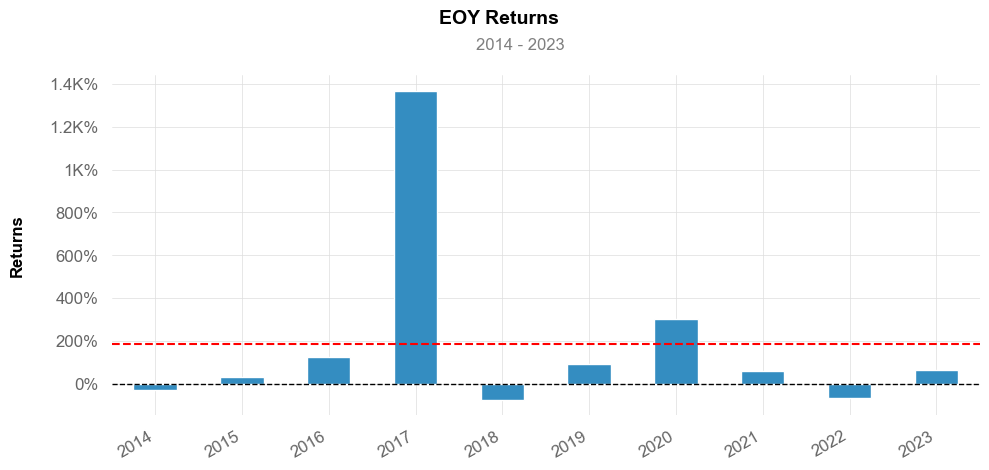

In [6]:
returns = price.vbt.to_returns()
returns.vbt.returns.qs.plot_yearly_returns()

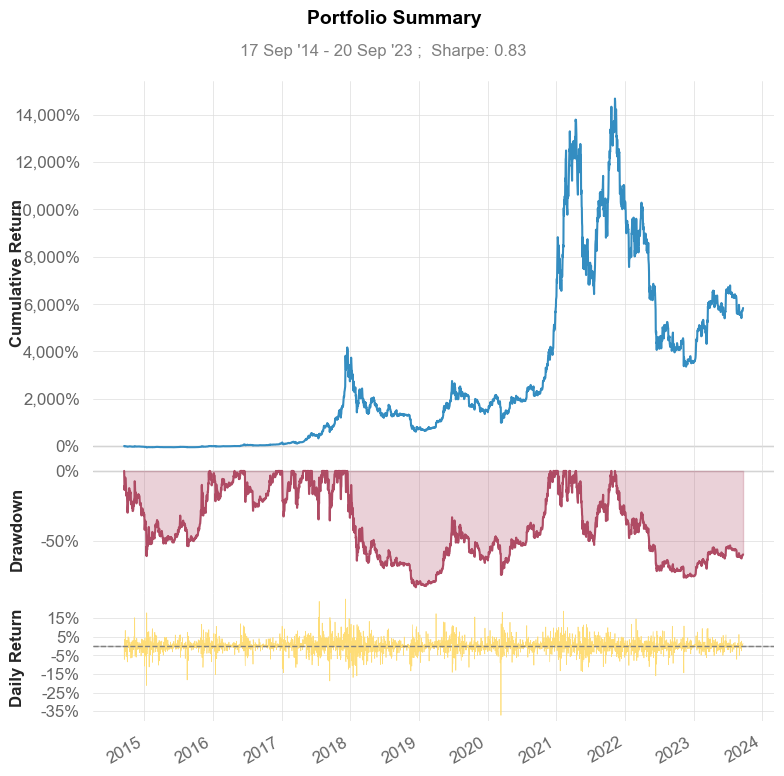

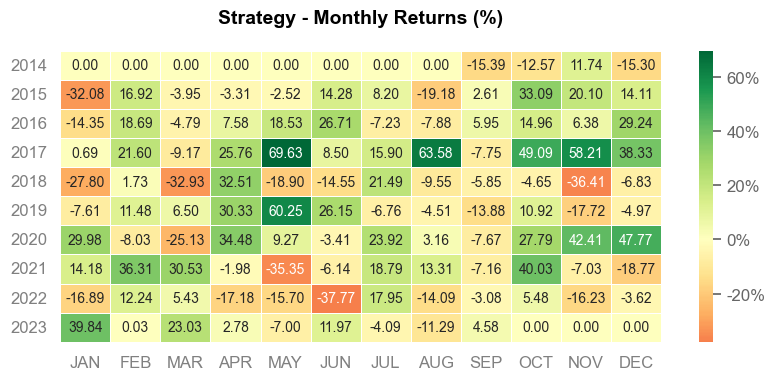

In [9]:
returns.vbt.returns.qs.plots_report()

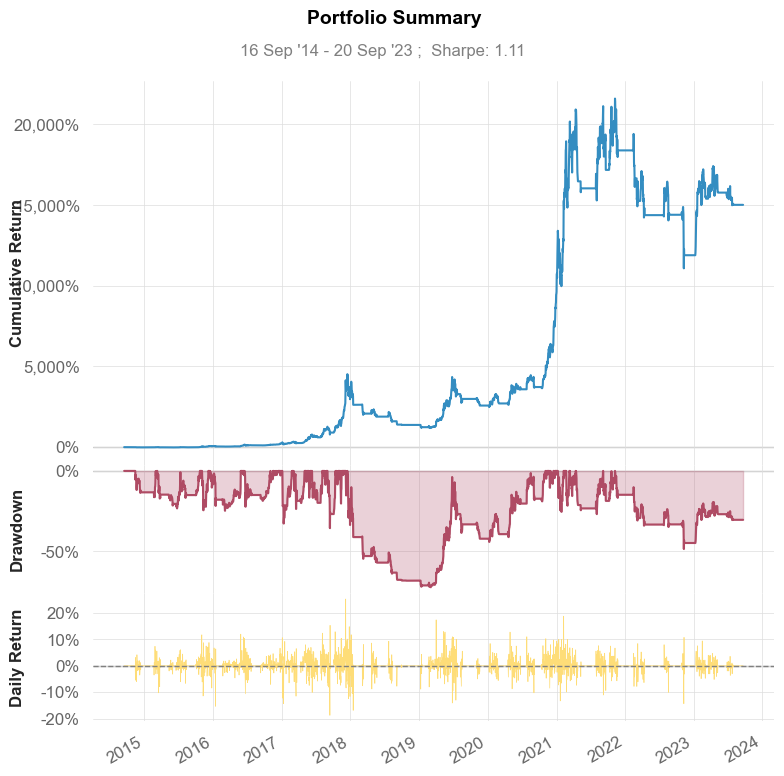

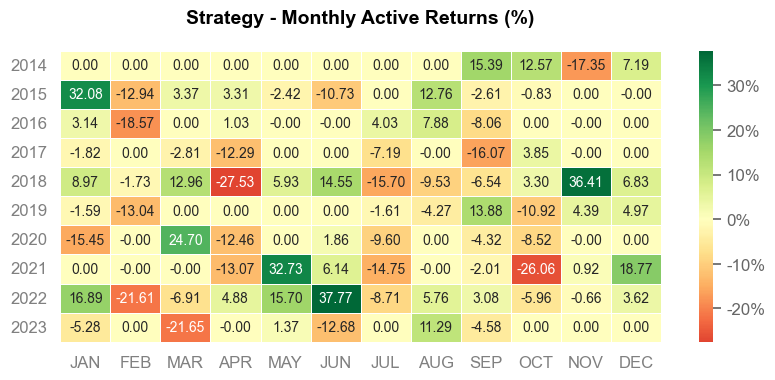

In [8]:
vbt.settings.array_wrapper.freq = 'D'

pf.qs.plots_report()


IndexError: index 0 is out of bounds for axis 0 with size 0

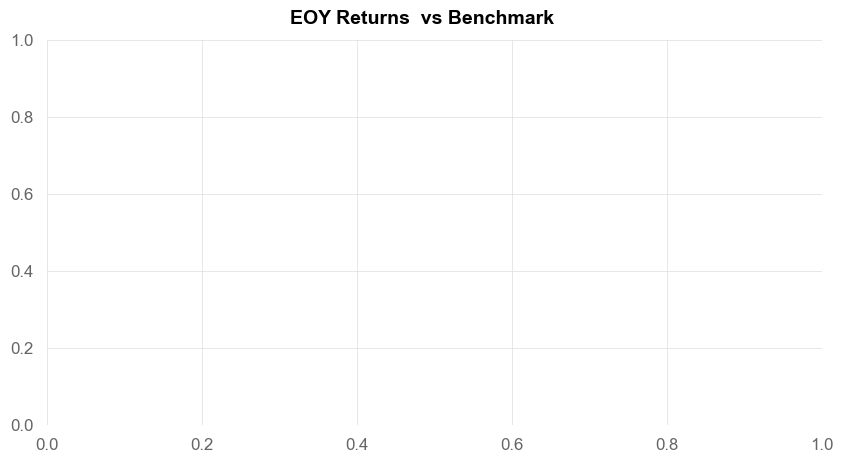

In [11]:
pf.qs.plot_yearly_returns()